<a href="https://colab.research.google.com/github/camilagonzalezquevedo/Tarea_2_Mec_Estadist/blob/main/P2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install numpy
!pip install matplotlib

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

# **Parte B, Problema 2:**

Recuperando la data de la tabla encontrada en el apartado a) del problema 2 para configuraciones con energía *E* y magnetización *M, N(E, M)* en redes cuadradas de tamaño 2×2, 4×4 con condiciones de borde periódicas.

In [2]:
def gray_flip(tau, N):
    k = tau[0]
    if k > N:
        return None, None
    tau[k-1] = tau[k]
    tau[k] = k + 1
    if k != 1:
        tau[0] = 1
    return tau, k

#energia del modelo de Ising con condiciones periodicas
def calculate_energy(spins, L):
    spins = spins.reshape(L, L)
    energy = 0
    for i in range(L):
        for j in range(L):
            S = spins[i, j]

            neighbors = [
                spins[i, (j + 1) % L],  #derecha
                spins[(i + 1) % L, j],  #abajo
                spins[i, (j - 1) % L],  #izquierda
                spins[(i - 1) % L, j]   #arriba
            ]
            energy -= S * sum(neighbors)
    return energy / 2

#magnetización total M
def calculate_magnetization(spins):
    return np.sum(spins)

#configuraciones y contar N(E, M)
def enumerate_ising_histogram(L):
    N = L * L
    spins = np.full(N, -1)
    tau = list(range(1, N + 2))
    histogram = {}

    for _ in range(2 ** N):
        E = calculate_energy(np.array(spins), L)
        M = calculate_magnetization(np.array(spins))

        if (E, M) not in histogram:
            histogram[(E, M)] = 1
        else:
            histogram[(E, M)] += 1

        tau, k = gray_flip(tau, N)
        if k is None:
            break

        spins[k-1] = -spins[k-1]

    return histogram

#tabla N(E, M)
def print_histogram_table(L):
    histogram = enumerate_ising_histogram(L)
    print(f"\nTabla N(E, M) para la red {L}x{L}:")
    for (E, M), count in sorted(histogram.items()):
      if E >= 0:
        print(f"E = {E}, M = {M},  N(E, M) = {count}")

#redes 2x2 y 4x4
for L in [2, 4]:
    print_histogram_table(L)



Tabla N(E, M) para la red 2x2:
E = 0.0, M = -2,  N(E, M) = 4
E = 0.0, M = 0,  N(E, M) = 4
E = 0.0, M = 2,  N(E, M) = 4
E = 8.0, M = 0,  N(E, M) = 2

Tabla N(E, M) para la red 4x4:
E = 0.0, M = -8,  N(E, M) = 228
E = 0.0, M = -6,  N(E, M) = 1248
E = 0.0, M = -4,  N(E, M) = 2928
E = 0.0, M = -2,  N(E, M) = 3680
E = 0.0, M = 0,  N(E, M) = 4356
E = 0.0, M = 2,  N(E, M) = 3680
E = 0.0, M = 4,  N(E, M) = 2928
E = 0.0, M = 6,  N(E, M) = 1248
E = 0.0, M = 8,  N(E, M) = 228
E = 4.0, M = -6,  N(E, M) = 448
E = 4.0, M = -4,  N(E, M) = 1568
E = 4.0, M = -2,  N(E, M) = 3136
E = 4.0, M = 0,  N(E, M) = 3264
E = 4.0, M = 2,  N(E, M) = 3136
E = 4.0, M = 4,  N(E, M) = 1568
E = 4.0, M = 6,  N(E, M) = 448
E = 8.0, M = -6,  N(E, M) = 128
E = 8.0, M = -4,  N(E, M) = 768
E = 8.0, M = -2,  N(E, M) = 1392
E = 8.0, M = 0,  N(E, M) = 2112
E = 8.0, M = 2,  N(E, M) = 1392
E = 8.0, M = 4,  N(E, M) = 768
E = 8.0, M = 6,  N(E, M) = 128
E = 12.0, M = -4,  N(E, M) = 64
E = 12.0, M = -2,  N(E, M) = 512
E = 12.0, M = 0,

# **Para la red 6x6:**

In [14]:
def gray_flip(tau, N):
    k = tau[0]
    if k > N:
        return None, None
    tau[k-1] = tau[k]
    tau[k] = k + 1
    if k != 1:
        tau[0] = 1
    return tau, k

#energia del modelo de Ising con condiciones periodicas
def calculate_energy(spins, L):
    spins = spins.reshape(L, L)
    energy = 0
    for i in range(L):
        for j in range(L):
            S = spins[i, j]

            neighbors = [
                spins[i, (j + 1) % L],  #derecha
                spins[(i + 1) % L, j],  #abajo
                spins[i, (j - 1) % L],  #izquierda
                spins[(i - 1) % L, j]   #arriba
            ]
            energy -= S * sum(neighbors)
    return energy / 2

#magnetización total M
def calculate_magnetization(spins):
    return np.sum(spins)

#configuraciones y contar N(E, M)
def enumerate_ising_histogram(L):
    N = L * L
    spins = np.full(N, -1)
    tau = list(range(1, N + 2))
    histogram = {}

    for _ in range(2 ** N):
        E = calculate_energy(np.array(spins), L)
        M = calculate_magnetization(np.array(spins))

        if (E, M) not in histogram:
            histogram[(E, M)] = 1
        else:
            histogram[(E, M)] += 1

        tau, k = gray_flip(tau, N)
        if k is None:
            break

        spins[k-1] = -spins[k-1]

    return histogram

#tabla N(E, M)
def print_histogram_table(L):
    histogram = enumerate_ising_histogram(L)
    print(f"\nTabla N(E, M) para la red {L}x{L}:")
    for (E, M), count in sorted(histogram.items()):
      if E >= 0:
        print(f"E = {E}, M = {M},  N(E, M) = {count}")


for L in [5]:
    print_histogram_table(L)



Tabla N(E, M) para la red 5x5:
E = 2.0, M = -11,  N(E, M) = 26050
E = 2.0, M = -9,  N(E, M) = 148550
E = 2.0, M = -7,  N(E, M) = 422350
E = 2.0, M = -5,  N(E, M) = 776100
E = 2.0, M = -3,  N(E, M) = 1084300
E = 2.0, M = -1,  N(E, M) = 1249600
E = 2.0, M = 1,  N(E, M) = 1249600
E = 2.0, M = 3,  N(E, M) = 1084300
E = 2.0, M = 5,  N(E, M) = 776100
E = 2.0, M = 7,  N(E, M) = 422350
E = 2.0, M = 9,  N(E, M) = 148550
E = 2.0, M = 11,  N(E, M) = 26050
E = 6.0, M = -11,  N(E, M) = 4450
E = 6.0, M = -9,  N(E, M) = 54475
E = 6.0, M = -7,  N(E, M) = 220750
E = 6.0, M = -5,  N(E, M) = 507100
E = 6.0, M = -3,  N(E, M) = 823500
E = 6.0, M = -1,  N(E, M) = 1027975
E = 6.0, M = 1,  N(E, M) = 1027975
E = 6.0, M = 3,  N(E, M) = 823500
E = 6.0, M = 5,  N(E, M) = 507100
E = 6.0, M = 7,  N(E, M) = 220750
E = 6.0, M = 9,  N(E, M) = 54475
E = 6.0, M = 11,  N(E, M) = 4450
E = 10.0, M = -9,  N(E, M) = 13800
E = 10.0, M = -7,  N(E, M) = 76800
E = 10.0, M = -5,  N(E, M) = 231620
E = 10.0, M = -3,  N(E, M) = 428

# **Histograma:**

Usando *N(E, M)*, graficamos la distribución de probabilidad ***$π_M$*** de la magnetización por spin *$m = M/N$* como función de la temperatura:

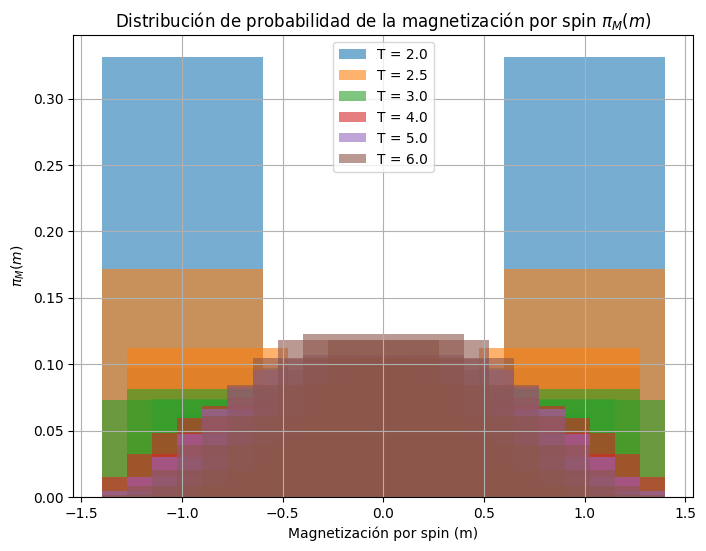

In [7]:
def calculate_energy(spins, L):
    spins = spins.reshape(L, L)
    energy = 0
    for i in range(L):
        for j in range(L):
            S = spins[i, j]
            neighbors = [
                spins[i, (j + 1) % L],  # derecha
                spins[(i + 1) % L, j],  # abajo
                spins[i, (j - 1) % L],  # izquierda
                spins[(i - 1) % L, j]   # arriba
            ]
            energy -= S * sum(neighbors)
    return energy / 2

#magnetizacion
def calculate_magnetization(spins):
    return np.sum(spins)

#N(E, M)
def enumerate_ising_histogram(L):
    N = L * L
    spins = np.full(N, -1)
    tau = list(range(1, N + 2))
    histogram = {}

    for _ in range(2 ** N):
        E = calculate_energy(np.array(spins), L)
        M = calculate_magnetization(np.array(spins))

        if (E, M) not in histogram:
            histogram[(E, M)] = 1
        else:
            histogram[(E, M)] += 1

        tau, k = gray_flip(tau, N)
        if k is None:
            break

        spins[k-1] = -spins[k-1]

    return histogram

#funcion de particion y probabilidad
def calculate_probabilities(L, temperatures):
    histogram = enumerate_ising_histogram(L)
    N = L * L
    probabilities = []

    for T in temperatures:
        Z = 0  #funcion de particion
        pi_M = {}  #probabilidad de magnetizacion

        for (E, M), count in histogram.items():
            beta = 1 / T
            weight = np.exp(-beta * E)
            Z += count * weight

            if M not in pi_M:
                pi_M[M] = count * weight
            else:
                pi_M[M] += count * weight

        #normalizacion
        for M in pi_M:
            pi_M[M] /= Z

        probabilities.append(pi_M)

    return probabilities

#distribucion de magnetizacion para diferentes temperaturas
def plot_magnetization_distribution(temperatures, probabilities, L):
    plt.figure(figsize=(8, 6))

    for i, T in enumerate(temperatures):
        M_values = np.array(list(probabilities[i].keys()))
        pi_M_values = np.array(list(probabilities[i].values()))
        m_values = M_values / (L * L)

        plt.bar(m_values, pi_M_values, alpha=0.6, label=f"T = {T}")

    plt.title("Distribución de probabilidad de la magnetización por spin $π_M(m)$")
    plt.xlabel("Magnetización por spin (m)")
    plt.ylabel("$π_M(m)$")
    plt.legend()
    plt.grid(True)
    plt.show()

#parametros
L = 4
temperatures = [2.0, 2.5, 3.0, 4.0, 5.0, 6.0]
probabilities = calculate_probabilities(L, temperatures)
plot_magnetization_distribution(temperatures, probabilities, L)


# Cambio de $π_M$:

Usando **Binder cumulant** $𝐵(𝑇)$, que caracteriza el comportamiento de la magnetización en diferentes regímenes de temperatura. El cumulante permite distinguir entre las fases ferromagnética (bimodal) y paramagnética (unimodal), observando como cambia con la temperatura y como se comporta cerca de la temperatura crítica $𝑇_𝑐$.

El **Binder Cumulant** está definido como:

$B(T) = \frac{2}{1} \left[ 3 - \frac{\langle m^2(T) \rangle^2}{\langle m^4(T) \rangle} \right]$

En particular:

**Alta temperatura:** $𝐵(𝑇)→0$ debido a la distribución unimodal alrededor de $𝑚=0$.

**Baja temperatura:** $𝐵(𝑇)→\frac{2}{3}$, reflejando una distribución bimodal (dos picos simétricos).

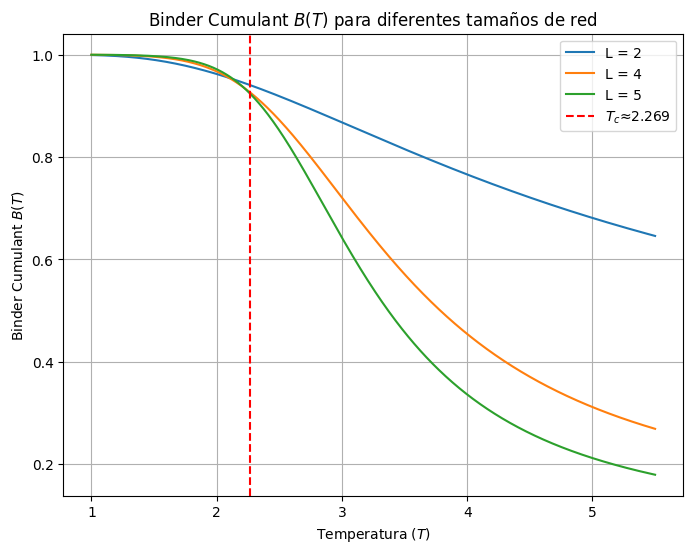

In [15]:
def calculate_energy(spins, L):
    spins = spins.reshape(L, L)
    energy = 0
    for i in range(L):
        for j in range(L):
            S = spins[i, j]
            neighbors = [
                spins[i, (j + 1) % L],  #derecha
                spins[(i + 1) % L, j],  #abajo
                spins[i, (j - 1) % L],  #izquierda
                spins[(i - 1) % L, j]   #arriba
            ]
            energy -= S * sum(neighbors)
    return energy / 2

def calculate_magnetization(spins):
    return np.sum(spins)


def enumerate_ising_histogram(L):
    N = L * L
    spins = np.full(N, -1)
    tau = list(range(1, N + 2))
    histogram = {}

    for _ in range(2 ** N):
        E = calculate_energy(np.array(spins), L)
        M = calculate_magnetization(np.array(spins))

        if (E, M) not in histogram:
            histogram[(E, M)] = 1
        else:
            histogram[(E, M)] += 1

        tau, k = gray_flip(tau, N)
        if k is None:
            break

        spins[k-1] = -spins[k-1]

    return histogram

#cumulantes de Binder
def calculate_binder_cumulant(L, temperatures):
    histogram = enumerate_ising_histogram(L)
    N = L * L
    binder_cumulants = []

    for T in temperatures:
        Z = 0  #funcion de particion
        m2 = 0  #⟨m^2(T)⟩
        m4 = 0  #⟨m^4(T)⟩

        for (E, M), count in histogram.items():
            beta = 1 / T
            weight = np.exp(-beta * E)
            Z += count * weight

            m = M / N
            m2 += count * weight * m**2
            m4 += count * weight * m**4

        #normalizacion
        m2 /= Z
        m4 /= Z

        #calculo del cumulante de Binder
        B_T = 0.5 * (3 - m4 / (m2 ** 2))
        binder_cumulants.append(B_T)

    return binder_cumulants

#grafico del cumulante de Binder para diferentes tamaños de red
def plot_binder_cumulants(temperatures, L_sizes):
    plt.figure(figsize=(8, 6))

    for L in L_sizes:
        binder_cumulants = calculate_binder_cumulant(L, temperatures)
        plt.plot(temperatures, binder_cumulants, label=f"L = {L}")

    plt.axvline(x=2 / np.log(1 + np.sqrt(2)), color='r', linestyle='--', label="$T_c ≈ 2.269$")
    plt.title("Binder Cumulant $B(T)$ para diferentes tamaños de red")
    plt.xlabel("Temperatura $(T)$")
    plt.ylabel("Binder Cumulant $B(T)$")
    plt.legend()
    plt.grid(True)
    plt.show()


L_sizes = [2, 4, 5]
temperatures = np.linspace(1.0, 5.5, 1000)

plot_binder_cumulants(temperatures, L_sizes)
